<h2> Gradient Descent with Multiple Inputs </h2>

<h3> Consider the 4 datapoints having features as toes, wlrec and nfans as inputs and based on this features and its respective weights, neural network has to predict given features whether they will or not </h3>

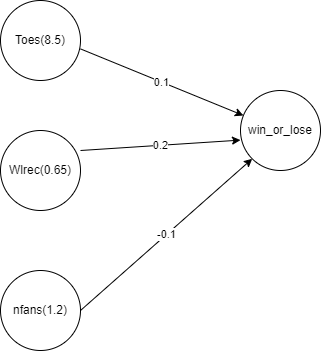

In [3]:
from IPython.display import Image
Image(filename='MultipleInputs.png')

In [5]:
toes = [8.5,9.5,9.9,9.0]
wlrec = [0.65,0.8,0.8,0.9]
nfans = [1.2,1.3,0.5,1.0]

win_or_lose_binary = [1,1,0,1]
true = win_or_lose_binary[0]

inputs = [toes[0],wlrec[0],nfans[0]]

weights = [0.1,0.2,-.1]
alpha  = 0.01

def neural_network(inputs,weights):
    assert(len(inputs)==len(weights))
    output = 0
    for idx in range(len(inputs)):
        output += inputs[idx] * weights[idx]

    return output

def ele_mul(delta,inputs):
    weight_deltas = [0,0,0]

    for idx in range(len(inputs)):
        weight_deltas[idx] = delta * inputs[idx]

    return weight_deltas


for _ in range(5):

    pred = neural_network(inputs,weights)

    error = (pred - true) ** 2

    delta = (pred - true)

    weight_deltas = ele_mul(delta,inputs)

    for idx in range(len(weights)):
        weights[idx] -= (alpha * weight_deltas[idx])

    print(f'Error : {error:.4f}, prediction : {pred:.4f}')
    print('Weights'+str(weights))
    print('delta'+str(weight_deltas))


Error : 0.0196, prediction : 0.8600
Weights[0.1119, 0.20091, -0.09832]
delta[-1.189999999999999, -0.09099999999999994, -0.16799999999999987]
Error : 0.0013, prediction : 0.9638
Weights[0.11498061250000001, 0.20114557625, -0.09788509000000001]
delta[-0.30806125000000056, -0.023557625000000044, -0.04349100000000008]
Error : 0.0001, prediction : 0.9906
Weights[0.1157781060609375, 0.20120656105171877, -0.09777250267375001]
delta[-0.07974935609374867, -0.006098480171874899, -0.011258732624999811]
Error : 0.0000, prediction : 0.9976
Weights[0.11598455720652519, 0.20122234849226373, -0.09774335662966704]
delta[-0.020645114558768884, -0.0015787440544940913, -0.0029146044082967834]
Error : 0.0000, prediction : 0.9994
Weights[0.1160380022468392, 0.2012264354659348, -0.09773581144750507]
delta[-0.005344504031401298, -0.0004086973671071581, -0.0007545182161978303]


<h2> Freezing one weight: what does it do? </h2>

In [7]:
toes = [8.5,9.5,9.9,9.0]
wlrec = [0.65,0.8,0.8,0.9]
nfans = [1.2,1.3,0.5,1.0]

win_or_lose_binary = [1,1,0,1]
true = win_or_lose_binary[0]

inputs = [toes[0],wlrec[0],nfans[0]]

weights = [0.1,0.2,-.1]
alpha  = 0.3

def neural_network(inputs,weights):
    output = 0
    for idx in range(len(weights)):
        output += inputs[idx] * weights[idx]

    return output

def ele_mul(delta,inputs):
    
    output = [0,0,0]
    for idx in range(len(inputs)):

        output[idx] = delta * inputs[idx]
    return output


for _ in range(5):

    pred = neural_network(inputs,weights)

    error = (pred - true) ** 2

    delta = pred - true

    weight_deltas = ele_mul(delta,inputs)

    weight_deltas[0] = 0

    for idx in range(len(weight_deltas)):
        weights[idx] -= alpha * weight_deltas[idx]
    
    print(f'Error : {error:.4f}')
    print(f'Predictions : {pred:.4f}')
    print(f'Weight 0 : {weights[0]:.4f}')
    print(f'Weight 1 : {weights[1]:.4f}')
    print(f'Weight 2 : {weights[2]:.4f}')
    

Error : 0.0196
Predictions : 0.8600
Weight 0 : 0.1000
Weight 1 : 0.2273
Weight 2 : -0.0496
Error : 0.0038
Predictions : 0.9382
Weight 0 : 0.1000
Weight 1 : 0.2393
Weight 2 : -0.0274
Error : 0.0007
Predictions : 0.9727
Weight 0 : 0.1000
Weight 1 : 0.2447
Weight 2 : -0.0175
Error : 0.0001
Predictions : 0.9880
Weight 0 : 0.1000
Weight 1 : 0.2470
Weight 2 : -0.0132
Error : 0.0000
Predictions : 0.9947
Weight 0 : 0.1000
Weight 1 : 0.2480
Weight 2 : -0.0113


<h2> Gradient Descent Learning with multiple outputs </h2>

<h3> Here predicting multiple attributes with respect to one datapoint </h3>

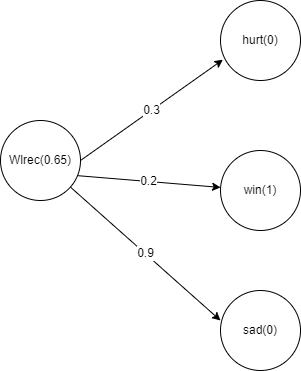

In [4]:
Image(filename='MultipleOutputs.png')

In [8]:
weights = [0.3,0.2,0.9]
def neural_network(input,weights):

    pred = ele_mul(input,weights)

    return pred

def ele_mul(input,weights):

    output = [0,0,0]
    for idx in range(len(weights)):
        output[idx] = weights[idx] * input
    return output

def scalar_ele_mul(number,vector):

    output = [0,0,0]

    for idx in range(len(vector)):
        output[idx] = number * vector[idx]
    return output

wlrec = [0.65,1.0,1.0,0.9]

hurt = [0.1,0.0,0.0,0.1]
win = [1,1,0,1]
sad = [0.1,0.0,0.1,0.2]

input = wlrec[0]

true = [hurt[0],win[0],sad[0]]

pred = neural_network(input,weights)

error = [0,0,0]
delta = [0,0,0]

for idx in range(len(true)):
    error[idx] = (pred[idx] - true[idx]) ** 2
    delta[idx] = (pred[idx] - true[idx])


weight_deltas = scalar_ele_mul(input,delta)
alpha = 0.1

for idx in range(len(weight_deltas)):
    weights[idx] -= alpha * weight_deltas[idx]

print('Weights'+str(weights))

Weights[0.293825, 0.25655, 0.868475]


<h2> Gradient Descent with Multiple Inputs and outputs </h2>

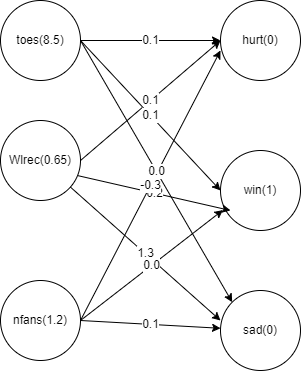

In [5]:
Image(filename='MultipleInputsMultipleOutputs.png')

In [12]:

weights = [[0.1,0.1,-0.3],
           [0.1,0.2,0.0],
           [0.0,1.3,0.1]]

def vec_mat_mul(vec,mat):

    output = [0,0,0]

    for idx in range(len(mat)):

        output[idx] = w_sum(vec,mat[idx])
    return output

def w_sum(vec_a,vec_b):

    output = 0

    for idx in range(len(vec_a)):
        output += vec_a[idx] * vec_b[idx]

    return output

def neural_network(input,weights):

    pred = vec_mat_mul(input,weights)

    return pred

toes = [8.5,9.5,9.9,9.0]
wlrec = [0.65,0.8,0.8,0.9]
nfans = [1.2,1.3,0.5,1.0]

hurt = [0.1,0.0,0.0,0.1]
win = [1,1,0,1]
sad = [0.1,0.0,0.1,0.2]

alpha = 0.01

inputs = [toes[0],wlrec[0],nfans[0]]
true = [hurt[0],win[0],sad[0]]

pred = neural_network(inputs,weights)

In [10]:
import numpy as np

In [13]:
error = [0,0,0]
delta = [0,0,0]

def outer_prod(vec_a,vec_b):

    output = np.zeros(shape=(len(vec_a),len(vec_b)))

    for i in range(len(vec_a)):
        for j in range(len(vec_b)):
            output[i][j] = vec_a[i] * vec_b[j]
    return output


for idx in range(len(true)):
    error[idx] = (pred[idx] - true[idx]) ** 2
    delta[idx] = (pred[idx] - true[idx])

weight_deltas = outer_prod(inputs,delta)

for i in range(len(weights)):
    for j in range(len(weights[0])):
        weights[i][j] -= alpha * weight_deltas[i][j]

